<a href="https://colab.research.google.com/github/Swara-24/Explainable-AI/blob/main/Colab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
#loading data
data = load_breast_cancer()
X=data.data
y=data.target

## PERMUTATION IMPORTANCE

In [ ]:
#splitting data
train_X, val_X, train_y, val_y = train_test_split(X, y)
#applying model
model = DecisionTreeClassifier(random_state=1)
#fitting model
model = model.fit(train_X, train_y)

In [ ]:
pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [ ]:
#calculate the importance of features in model by shuffling
perm = PermutationImportance(model, random_state=0)
perm = perm.fit(val_X, val_y)

In [ ]:
#show the weights (accuracy ± variance) for every feature
eli5.show_weights(perm, feature_names = data.feature_names,top=30) 
#since len(data.feature_names)=30 we have assigned it to top to get all the features.

Weight,Feature
0.1189 ± 0.0125,worst radius
0.0937 ± 0.0168,area error
0.0476 ± 0.0224,worst area
0.0448 ± 0.0209,mean concave points
0.0350 ± 0.0234,worst texture
0.0336 ± 0.0206,mean smoothness
0.0098 ± 0.0190,mean compactness
0.0070 ± 0.0234,mean texture
0.0056 ± 0.0105,worst smoothness
0 ± 0.0000,mean area


INTERPRETATION -

The permutation importance shuffles the features(independent variables) and performs the classification (according to the model) multiple times. It identifies which of them have the greatest impact on the dependent variable y.

The most important features are those displayed at the top of the list with the max. accuracy (example - mean concave points).

A large number of features with accuracy 0 are not useful at all.

Features at the bottom with negative accuracy are found to be more accurate when shuffled.

## PARTIAL DEPENDENCE PLOTS

In [ ]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
pdp_model = GradientBoostingClassifier()
pdp_model.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dis

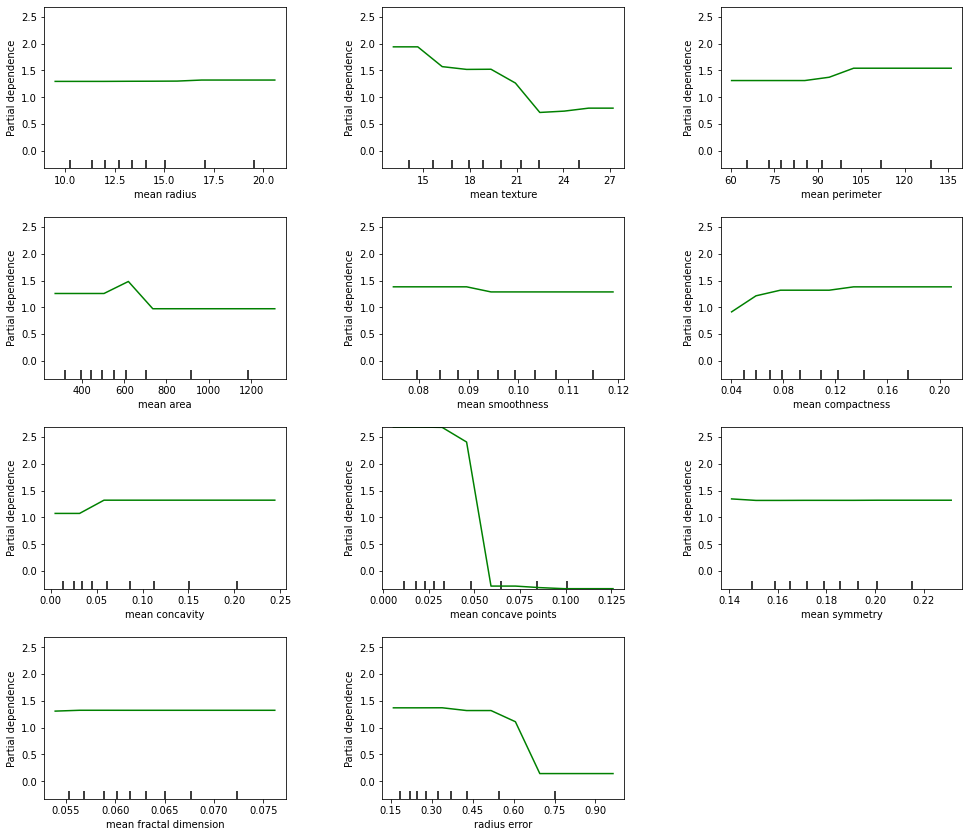

In [ ]:
fig,ax = plot_partial_dependence(pdp_model,       
                                   features=[0,1,2,3,4,5,6,7,8,9,10], # first 11 columns
                                   X=X,            # required data 
                                   feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
                                    'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis
#resizing                                   
fig.set_figwidth(15)
fig.set_figheight(20)

INTERPRETATION -
The values on y axis is the average value of target variable(banign,malignant) on multiple records of a particular value(say, 0.15,0.30 and so on) of a feature(say radius error).
Higher value on y axis means malignant breast cancer and lower value implies benign.

Features like mean radius and mean symmetry have no impact/dependence on target variable (which have horizontal straight line).

The graphs show the increasing / decreasing nature with increase in the value of features -

Example : In the plot showing mean concave points, it can be inferred that lower value of mean concave points(below 0.06) mean malignant cancer and vice versa since the graph is decreasing in nature.

## ICE(Individual Conditional Expectation) PLOTS

In [ ]:
pip install pdpbox

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
#converting into dataframe
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


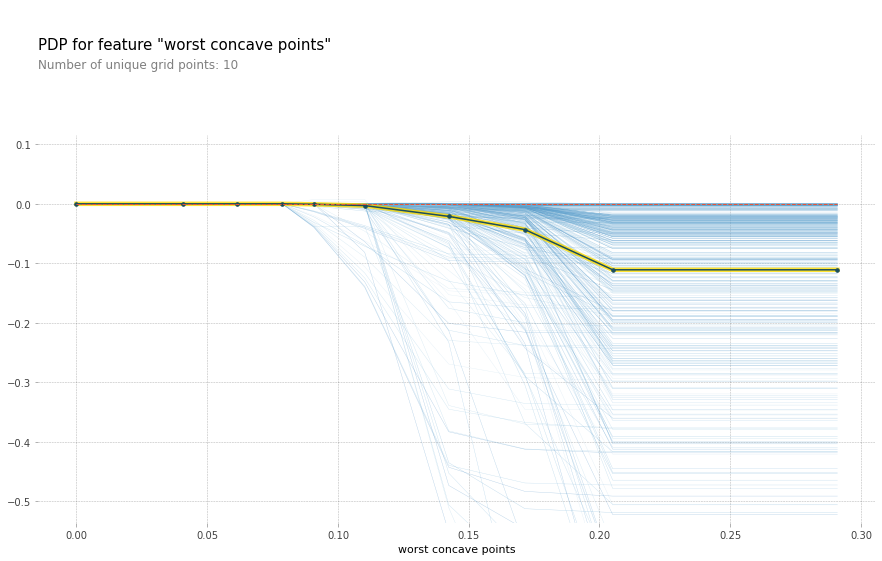

In [ ]:
ice = pdp.pdp_isolate(model=pdp_model, dataset=df, model_features=df.columns.tolist(), feature='worst concave points')
pdp.pdp_plot(ice, 'worst concave points', plot_lines=True)
plt.show()

The "worst concave points" plot is decreasing in nature i.e. Lower value(<0.10) of concave points is a factor for higher value of target variable(malignant cases). Between 0.10 and 0.20 the graph decreases and after 0.21 it is constant(has lower y value - benign cases).

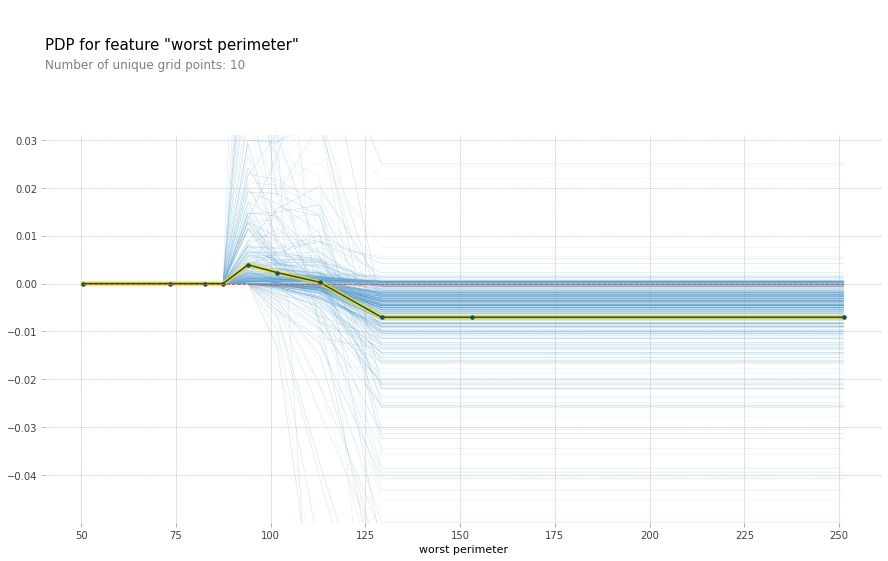

In [ ]:
ice = pdp.pdp_isolate(model=pdp_model, dataset=df, model_features=df.columns.tolist(), feature='worst perimeter')
pdp.pdp_plot(ice, 'worst perimeter', plot_lines=True)
plt.show()

INTERPRETATION -

Unlike in PDP plots where the value on y axis is averaged for several records, here all the lines are shown. 

The "worst perimeter" plot is decreasing in nature i.e. Lower value(<90) of worst parameter is a factor for higher value of target variable(malignant cases). Between 90 and 100 the graph increases in many cases, then decreases slightly and for higher values (>125) it is constant(has lower y value - benign cases).

On the yellow line, Negative value means that the y is less than the actual average for that perimeter.

## GLOBAL SURROGATE

In [ ]:
!pip install skater

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [ ]:
#interpreter is an object of interpretation
interpreter = Interpretation(training_data=val_X, training_labels=val_y, feature_names=data.feature_names)
# val_X , val_y are the testing datasets and data.feature_names will return the column names to parameter feature_names 
global_model = InMemoryModel(pdp_model.predict_proba, examples=train_X, target_names=['Benign', 'Malignant'])
#The predicted probabilities of classifier model are passed in the parameter

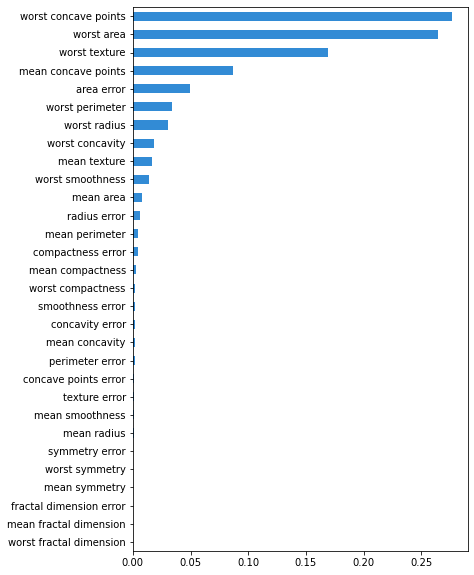

In [ ]:
fig,ax = interpreter.feature_importance.plot_feature_importance(global_model, progressbar=False)#plotting feature importance
fig.set_figheight(10)#for resizing

INTERPRETATION -
Global Surrogate Model takes the raw data and trains it using interpretable model.

The feature importance is plotted which shows that the most important feature in this dataset is worst area. mean concave points, worst concave points, worst concavity, worst texture , area error etc. are some other crucial features.

Earlier, we have seen the partial dependence plots of various features and ICE plot of worst concave points and worst parameter, which show in detail their impact on target.

## LIME ON TEXT

Step 1: loading the text dataset from sklearn

In [ ]:
from sklearn.datasets import fetch_20newsgroups

Step 2: Text classification - determiming the type of text

In [ ]:
# CONSIDER 4 CATEGORIES
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

Step 3: Splitting into 2

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

Step 4: Defining the class names according to the categories

In [ ]:
class_names = ['atheism', 'christian','graphics','med']

Step 5: Tokenizing the text using Vectoriser

In [ ]:
import sklearn

In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

Step 6: Training using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(test_vectors)
mean_absolute_error(newsgroups_test.target, pred)

0.3215712383488682

Step 7 :Lime prediction

In [ ]:
pip install lime

In [ ]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [ ]:
newsgroups_test.data[0]

"From: brian@ucsd.edu (Brian Kantor)\nSubject: Re: HELP for Kidney Stones ..............\nOrganization: The Avant-Garde of the Now, Ltd.\nLines: 12\nNNTP-Posting-Host: ucsd.edu\n\nAs I recall from my bout with kidney stones, there isn't any\nmedication that can do anything about them except relieve the pain.\n\nEither they pass, or they have to be broken up with sound, or they have\nto be extracted surgically.\n\nWhen I was in, the X-ray tech happened to mention that she'd had kidney\nstones and children, and the childbirth hurt less.\n\nDemerol worked, although I nearly got arrested on my way home when I barfed\nall over the police car parked just outside the ER.\n\t- Brian\n"

In [ ]:
print(c.predict_proba([newsgroups_test.data[0]]))

[[0.142 0.3   0.374 0.184]]


These are the probablities for all 4 categories for the data shown above.

In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
idx = 83
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6,top_labels=4)#generate an explanation with at most 6 features 
print('Document id: %d' % idx)
print('Probability(atheism) =', c.predict_proba([newsgroups_test.data[idx]])[0,0])
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('Probability(graphics) =', c.predict_proba([newsgroups_test.data[idx]])[0,2])
print('Probability(med) =', c.predict_proba([newsgroups_test.data[idx]])[0,3])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Document id: 83
Probability(atheism) = 0.036
Probability(christian) = 0.666
Probability(graphics) = 0.172
Probability(med) = 0.126
True class: christian


The highest probability was for christian , thus it is predicted right. 

In [ ]:
exp.as_list()#explainer

[('AVS', 0.07840378346116014),
 ('graphics', 0.04504032920473611),
 ('1993', -0.029368971831893135),
 ('is', -0.026997643433973526),
 ('medicine', -0.023548338415239397),
 ('in', -0.02313927246494799)]

In [ ]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['AVS']] = 0
tmp[0,vectorizer.vocabulary_['graphics']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

Original prediction: 0.666
Prediction removing some features: 0.618
Difference: -0.04800000000000004


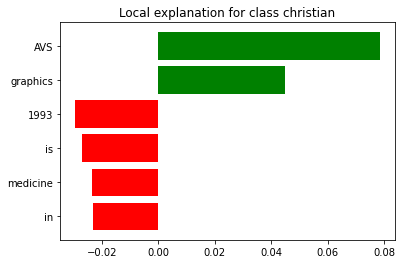

In [ ]:
fig = exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(text=False)

INTERPRETATION -
The prediction probability of Christian is the highest.  The other 4 grpahs on right show the respective probabilities of being and not being the category.

## LIME ON IMAGE

Step 1 - Read and pre-process image
The image is resized, displayed and pre-processed for Inception V3. The variable 'Xi' contains the image. 

In [ ]:
import skimage.io 
import skimage.segmentation

Image to be read


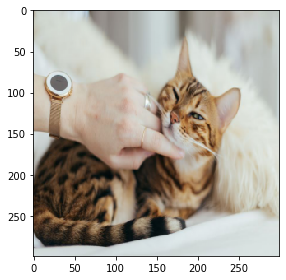

In [ ]:
print("Image to be read")
Xi = skimage.io.imread("https://www.data-imaginist.com/assets/images/kitten.jpg") #link for image to be read
Xi = skimage.transform.resize(Xi, (299,299)) # resizing image
skimage.io.imshow(Xi)# Show image 
Xi = (Xi - 0.5)*2 #Inception pre-processing of image

Step 2 - InceptionV3 initialization

The pre-trained InceptionV3 model is available in Keras, which is a widely-used image recognition model and has been shown to have more than 78.1% accuracy on the ImageNet dataset.

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

Step 3 - Predict class of input image using Inception V3 model.

In [ ]:
import numpy as np
from keras.applications.imagenet_utils import decode_predictions

In [ ]:
print("The top 5 classes of predictions are - ")
preds = inceptionV3_model.predict(Xi[np.newaxis,:,:,:]) #np.newaxis is used to increase the dimension of the existing array by one. Here,Input should be 4D
print(decode_predictions(preds)) #top = 5 by default

The top 5 classes of predictions are - 
[[('n02124075', 'Egyptian_cat', 0.46517527), ('n02123045', 'tabby', 0.19108842), ('n02123159', 'tiger_cat', 0.15482591), ('n02127052', 'lynx', 0.043455016), ('n04553703', 'washbasin', 0.0033444196)]]


(1, 1000)

The description of these classes is shown and it can be seen that the "Egyptian cat" is the top class for the given image with the max probability of 0.465.

In [ ]:
preds.shape

(1, 1000)

The predicted output(preds) is a vector of 1000 proabilities for each class available in Inception V3. 

In [ ]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
print("The indices of the top 5 classes ")
top_pred_classes               

The indices of the top 5 classes 


array([285, 281, 282, 287, 896])

Step 4 - Extract super-pixels from image

In [ ]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2) #the higher the kernel size,max_dist, the fewer are the clusters
#Segments image using quickshift clustering
num_superpixels = np.unique(superpixels).shape[0]
print("The number of super pixels generated")
num_superpixels

The number of super pixels generated


66

The generated superpixels are shown in the image below using mark_boundaries.

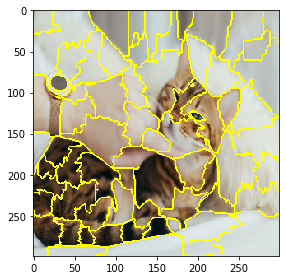

In [ ]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))

Step 5 - Random perturbations

In [ ]:
np.random.seed(222)
num_perturb = 150 
#150 perturbations
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))# The size corresponds to the (no. of perturbations x no. of superpixels) in the image.
print(" Here, '1' represent ON(active) superpixel and '0' represents OFF.")
perturbations[0]

 Here, '1' represent ON(active) superpixel and '0' represents OFF.


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
import copy

In [ ]:
def perturb_image(img,perturbation,segments): #takes in the parameters : raw image, perturbation vector and superpixels generated
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image #returns the perturbed image

The perturbed image


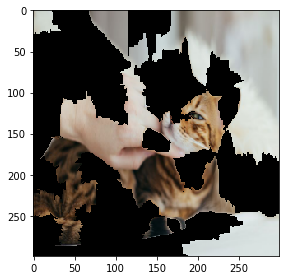

In [ ]:
print("The perturbed image")
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels)) 

Step 6 - Predict classes of new generated images 

In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = inceptionV3_model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)

Step 7 - Compute distances between the original image and each of the perturbed images.

In [ ]:
import sklearn.metrics

In [ ]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
#The distance between each randomly generated perturnation and the image being explained is computed using the cosine distance. 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()#ravel() function is used to create a contiguous flattened array.
#distances

Step 8 - Compute weights (importance) of each perturbed image using kernel.
The distances are then mapped to a value between zero and one (weight). 

In [ ]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

Step 9 - Use 'perturbations', 'predictions' and 'weights' to fit an explainable (linear) model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,top_pred_classes[0]], sample_weight=weights) # the top predicted class is to be explained
coeff = simpler_model.coef_[0] 
coeff.shape # Each coefficient in the linear model corresponds to one superpixel in the segmented image.

(66,)

Step 10 - Compute top features (superpixels)

In [ ]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
#Now we need to sort the coefficients to figure out which are the superpixels that have larger coefficients (magnitude) for the prediction of egyptian cat. 
top_features

array([43, 35, 24, 29])

The superpixels of the top 4 features are shown.

Last Step - Show image with top features

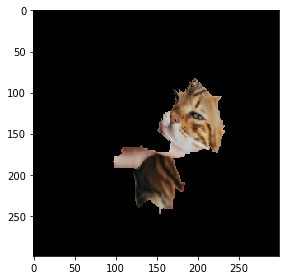

In [ ]:
mask = np.zeros(num_superpixels) #The less relevant pixels are black and only the top superpixels are activated.
mask[top_features]= True 
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )

Conclusion -

This is the area of the image that produced the prediction of Egyptian cat. 

## SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394124 sha256=b0ac5c59a5a8cafdc2b1444d565789562678fb34f7d7a8bdea5dda232a843c89
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import shap

TREE EXPLAINER

In [ ]:
explainer = shap.TreeExplainer(pdp_model)
#calculate shap values
shap_values = explainer.shap_values(val_X)

Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared.

In [ ]:
X_shap = pd.DataFrame(shap_values)
#display shap values
X_shap.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.001835,0.284065,0.041791,-0.156820,0.028727,0.003482,-0.022626,0.944852,-0.003207,0.001007,0.013909,-0.265265,-0.009284,0.161859,0.016844,0.051386,0.001138,-0.131045,-0.002838,-0.001717,-1.589787,0.268012,-1.822140,-2.711282,-0.339792,-0.154557,-0.408325,0.087551,0.016601,-0.029555
1,0.008957,-0.602020,-0.157345,-0.335398,-0.034056,-0.398716,-0.104822,0.413821,-0.080028,0.009108,-1.942775,-0.048825,-0.006244,-3.928573,0.016973,-0.151379,-0.051735,0.119684,-0.092931,-0.062570,0.527202,0.083395,0.162922,0.674194,0.517926,-0.560352,0.633718,0.447868,-0.612006,-0.265319
2,-0.001811,0.137491,-0.057488,0.011756,-0.014243,0.002960,-0.003522,1.043675,-0.002419,0.000922,0.029490,-0.000810,-0.006244,0.272534,0.018103,0.043335,-0.000687,0.150024,0.003217,0.168031,0.634148,0.313127,0.680464,1.590303,0.159871,0.007946,-0.320171,0.617634,0.026670,-0.000149
3,0.001883,-0.004876,0.190119,-0.276846,-0.014243,0.009752,0.008299,-1.268509,-0.019503,0.001407,-0.594179,0.010479,-0.022538,-1.163442,0.004741,0.007829,0.005091,0.051190,0.000730,-0.022760,-1.007287,-0.011220,-1.390668,-1.710696,0.100619,0.031729,-0.214437,-1.778493,0.038836,-0.007121
4,-0.001716,0.380076,-0.028025,-0.059219,-0.014243,-0.002853,0.027855,0.670558,-0.000342,0.002770,0.037714,-0.000034,0.025799,0.330505,0.011119,-0.072025,-0.023788,0.146612,-0.003082,-0.001653,0.333120,1.061482,0.551738,1.295886,-0.176244,0.009125,0.648733,0.607589,0.025870,-0.000098


In [ ]:
print('Expected Value/base value: ', explainer.expected_value)

Expected Value:  [1.83739012]


The expected value of the model output. The su of the rows of matrix shows the difference between actual and expected value .

In [ ]:
test_X=pd.DataFrame(val_X,columns=data.feature_names)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

INTERPRETATION -

The above explanation shows features which are contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and their visual size shows the magnitude of the feature's effect and those pushing the prediction lower are in blue. 


We predicted -3.89, whereas the base_value is 1.837. The biggest impact comes from mean concave points being 0.04079. Though the worst area value has high effect(989.5) decreasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output. (Here, 3.89+3.837-5.89 = 1.837)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], test_X.iloc[:1000,:])

INTERPRETATION -

This is the combined force plot. Here the values on y axis are the values that are shown by the x axis on an individual force plot. By dragging along the graph , the impact of the features can be seen for all the samples in our dataset. 

Example, the values from 10 to 91 (the red portion) has the worst area and mean concave points as the ones that  are pushing the prediction higher.

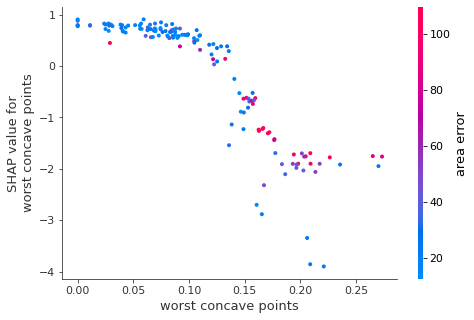

In [ ]:
shap.dependence_plot("worst concave points", shap_values, test_X)

INTERPRETATION -

The plot represents the change in predicted worst concave points. Vertical dispersion at a single value represents interaction effects with other features. To find interactions dependence_plot automatically selects another feature for coloring. In this case coloring by area error highlights that worst concave points has high impact on concave points on a high area error and vice versa.

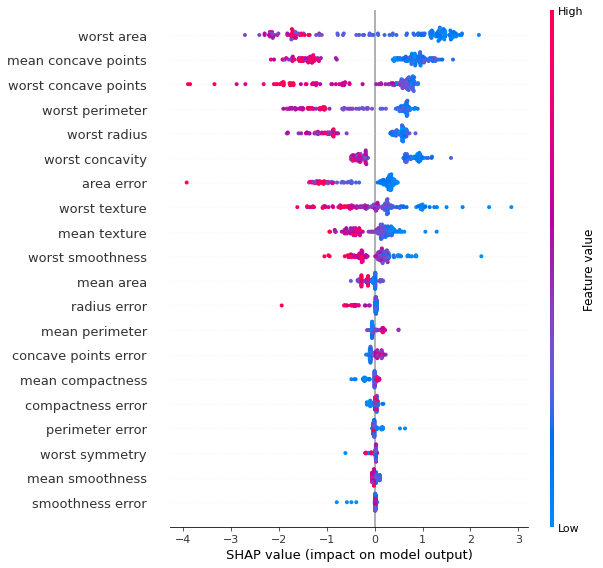

In [ ]:
shap.summary_plot(shap_values, test_X)

INTERPRETATION -

The plot sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high MEAN CONCAVE POINTS indicates BENIGN CANCER.

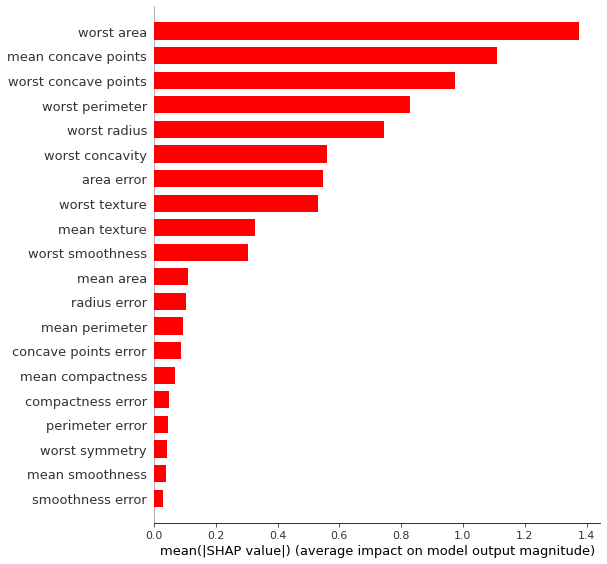

In [ ]:
shap.summary_plot(shap_values, test_X, plot_type="bar", color='red')

INTERPRETATION -

The mean absolute value of the SHAP values for each feature is shown. Worst area has the maximum followed by mean concave points ,then worst concave points and so on. Smoothness error has the least.

CONCLUSION -

From all the above plots (permutation importance , partial dependence, ice , global surrogate, shap), it can be stated that WORST AREA, MEAN CONCAVE POINTS, WORST CONCAVE POINTS , WORST RADIUS are some of the most important features in the breast cancer dataset.